In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

print(X_train.shape)

(784, 41000)


In [3]:
X_train[:, 0].shape

(784,)

In [4]:
def init_params():
    W1 = np.random.uniform(-0.5, 0.5, (20, 784))
    W2 = np.random.uniform(-0.5, 0.5, (10, 20))
    b1 = np.zeros((20, 1))
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(  int(iterations)):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, float(alpha))
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 5 6 ... 6 5 6] [2 7 2 ... 8 7 8]
0.10385365853658536
Iteration:  10
[2 5 6 ... 8 5 2] [2 7 2 ... 8 7 8]
0.19217073170731708
Iteration:  20
[2 5 6 ... 8 1 7] [2 7 2 ... 8 7 8]
0.31185365853658537
Iteration:  30
[2 5 6 ... 8 1 2] [2 7 2 ... 8 7 8]
0.43902439024390244
Iteration:  40
[2 7 2 ... 8 1 2] [2 7 2 ... 8 7 8]
0.5315609756097561
Iteration:  50
[2 7 2 ... 8 1 2] [2 7 2 ... 8 7 8]
0.5960243902439024
Iteration:  60
[2 7 2 ... 8 1 2] [2 7 2 ... 8 7 8]
0.6414878048780488
Iteration:  70
[2 7 2 ... 8 1 2] [2 7 2 ... 8 7 8]
0.6755853658536586
Iteration:  80
[2 7 2 ... 8 1 2] [2 7 2 ... 8 7 8]
0.7014878048780487
Iteration:  90
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.7217560975609756
Iteration:  100
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.7385609756097561
Iteration:  110
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.7524878048780488
Iteration:  120
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.7636829268292683
Iteration:  130
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.7737560975609756
Iteration:  1

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 0 7 3 1 1 3 9 9 9 6 7 8 8 2 4 1 1 3 9 3 4 6 5 8 8 3 6 9 7 0 5 6 1 6 2 4
 3 0 9 3 2 0 2 5 0 3 6 3 3 1 8 5 6 1 7 8 2 0 5 3 4 5 8 3 7 5 4 0 6 2 5 4 2
 7 9 3 5 2 6 4 5 1 2 9 2 0 5 3 0 9 4 1 0 9 2 5 7 4 2 3 5 0 1 5 3 9 4 7 3 3
 7 6 3 5 7 6 0 7 8 3 5 6 7 2 0 0 8 6 3 4 7 7 8 2 1 8 1 6 4 5 7 1 3 5 1 4 9
 9 7 6 3 6 6 7 8 8 4 6 1 7 7 1 6 1 6 5 8 7 3 3 0 3 9 2 6 9 1 6 0 8 6 9 6 9
 8 2 5 1 6 9 4 5 8 8 6 5 1 2 5 2 6 2 6 6 5 6 7 9 0 8 1 1 1 7 5 7 0 7 0 1 7
 1 1 6 1 1 9 9 3 4 9 5 0 1 5 0 5 6 5 0 1 1 9 1 1 8 4 6 6 1 3 6 8 9 1 0 7 3
 9 9 1 2 3 4 5 8 6 8 3 1 8 1 8 9 9 9 5 5 0 3 8 5 2 2 1 9 7 1 4 8 1 1 5 1 0
 7 6 9 2 3 7 1 7 3 4 9 9 0 3 8 3 6 1 0 5 0 0 0 7 4 0 6 1 8 8 6 1 0 1 0 7 3
 6 8 6 1 0 8 6 3 3 7 0 1 1 6 3 7 8 5 9 0 8 8 7 8 0 0 8 4 1 4 0 6 9 5 3 1 3
 0 0 9 6 3 1 9 3 1 4 1 1 0 6 7 3 7 6 8 7 0 7 3 1 8 6 4 6 4 7 3 8 3 8 2 0 8
 4 2 3 7 3 9 3 2 1 6 4 8 4 0 1 7 8 7 8 1 9 1 8 7 5 5 6 4 6 1 8 2 9 6 8 8 5
 1 4 3 9 3 5 4 0 9 3 4 2 9 1 7 7 1 3 9 5 4 6 5 2 1 4 3 1 4 0 3 1 5 0 8 5 9
 7 7 5 6 4 6 8 2 2 9 8 1 

0.879

Still 84% accuracy, so our model generalized from the training data pretty well.

In [11]:
def run_episode(X_train, Y_train, policy):
    alpha, epochs = policy
    W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha, epochs)
    dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
    accuracy = get_accuracy(dev_predictions, Y_dev)
    
    return accuracy

In [13]:
def gen_random_policy():
    alpha = np.random.uniform(low=0.01, high=0.10, size=(5)).astype(float)
    epochs = np.random.uniform(low=100, high=500, size=(5)).astype(int)
    return alpha, epochs

In [14]:
def fitness_func(population): #<--2D array input
    scores = []
    for i in population:
        acc = run_episode(X_train, Y_train,i)
        scores.append(acc)
        print(f'Done for {i}')

    return scores

In [15]:
def select_mating_pool(pop, qualities, num_parents):
    """
    Selects the best individuals in the current generation, according to the 
    number of parents specified, for mating and generating a new better population.
    """
    parents = np.zeros((num_parents, pop.shape[1])) 
    
    for parent_num in range(num_parents):
        
        # Retrieving the best unselected solution.
        max_qual_idx = np.where(qualities == np.max(qualities))
        max_qual_idx = max_qual_idx[0][0]
        # Appending the currently selected 
        parents[parent_num, :] = pop[max_qual_idx, :]
        """
        Set quality of selected individual to a negative value to not get 
        selected again. Algorithm calcululations will just make qualities >= 0.
        """
        qualities[max_qual_idx] = -1
    return parents

In [45]:
def crossover(parents):
    cross_lst = []
    
    for idx, A in enumerate(parents):
        for B in parents[idx + 1:]:
            rand_num = np.random.uniform()
            a1, _ = A
            _, b2 = B
            
            if rand_num > 0.5 :
                print(f'rand_num = {rand_num}  do Cross :')
                cross_lst.append([a1,b2])
            else :
                print(f'rand_num = {rand_num}  Dont cross :')
                cross_lst.append(A)
            
    return np.array(cross_lst)

In [102]:
def mutation(cross_parents):
    for i in cross_parents:

        rand_num = np.random.uniform()

        if rand_num < 0.3:

            gene_num = np.random.randint(0, 2)

            if gene_num == 0:
                new_value = np.random.uniform(0.01, 0.10)
                i[0] = new_value

            else:
                new_value = int(np.random.uniform(100, 500))
                i[1] = new_value

    return(cross_parents)

In [108]:
#the whole genetic algorithm :

num_parents = 4

alphas, epochss = gen_random_policy()
new_population = [[alphas[i], epochss[i]] for i in range(5)]

for iteration in range(5):
    
    qualities = fitness_func(new_population)
    
    #---------SAVE-ALL-HISTORY-------------------------
    max_acc = max(qualities)
    idx_max_acc = np.argmax(qualities)
    best_policy = new_population[idx_max_acc]
    #--------------------------------------------------
    
    new_population = select_mating_pool(np.array(new_population), qualities, num_parents)
    
    new_population = crossover(np.array(new_population))
    
    new_population = mutation(np.array(new_population))
    
    print(new_population)

Iteration:  0
[3 8 3 ... 8 1 9] [2 7 2 ... 8 7 8]
0.07358536585365853
Iteration:  10
[3 3 3 ... 3 3 3] [2 7 2 ... 8 7 8]
0.14504878048780487
Iteration:  20
[3 3 3 ... 3 7 3] [2 7 2 ... 8 7 8]
0.19358536585365854
Iteration:  30
[3 7 3 ... 3 7 3] [2 7 2 ... 8 7 8]
0.2415121951219512
Iteration:  40
[3 7 3 ... 3 7 3] [2 7 2 ... 8 7 8]
0.27931707317073173
Iteration:  50
[3 7 3 ... 3 7 3] [2 7 2 ... 8 7 8]
0.31397560975609756
Iteration:  60
[3 7 3 ... 3 7 3] [2 7 2 ... 8 7 8]
0.3464390243902439
Iteration:  70
[3 7 3 ... 3 7 3] [2 7 2 ... 8 7 8]
0.37626829268292683
Iteration:  80
[3 7 3 ... 3 7 3] [2 7 2 ... 8 7 8]
0.4044878048780488
Iteration:  90
[3 7 3 ... 3 7 3] [2 7 2 ... 8 7 8]
0.4317560975609756
Iteration:  100
[3 7 3 ... 8 7 3] [2 7 2 ... 8 7 8]
0.4596829268292683
Iteration:  110
[3 7 3 ... 8 7 3] [2 7 2 ... 8 7 8]
0.5012439024390244
Iteration:  120
[3 7 3 ... 8 7 3] [2 7 2 ... 8 7 8]
0.5298536585365854
Iteration:  130
[3 7 3 ... 8 7 3] [2 7 2 ... 8 7 8]
0.553609756097561
Iteration:  

Iteration:  200
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7193414634146341
Iteration:  210
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7289268292682927
Iteration:  220
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7367560975609756
Iteration:  230
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7440731707317073
Iteration:  240
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.751219512195122
Iteration:  250
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7576829268292683
Iteration:  260
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7630731707317073
Iteration:  270
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.768609756097561
Iteration:  280
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7739512195121951
Iteration:  290
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7784390243902439
Iteration:  300
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7830731707317073
Iteration:  310
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7870731707317074
Iteration:  320
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7918780487804878
Iteration:  330
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.795829268292683
Iteration

Iteration:  10
[6 9 6 ... 4 9 9] [2 7 2 ... 8 7 8]
0.20087804878048782
Iteration:  20
[6 9 6 ... 4 9 9] [2 7 2 ... 8 7 8]
0.23065853658536586
Iteration:  30
[6 9 6 ... 4 9 8] [2 7 2 ... 8 7 8]
0.2608536585365854
Iteration:  40
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.2904634146341463
Iteration:  50
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.32009756097560976
Iteration:  60
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.35209756097560974
Iteration:  70
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.38241463414634147
Iteration:  80
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.409780487804878
Iteration:  90
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.435
Iteration:  100
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.45851219512195124
Iteration:  110
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.47873170731707315
Iteration:  120
[6 9 6 ... 4 1 8] [2 7 2 ... 8 7 8]
0.49990243902439024
Iteration:  130
[6 9 6 ... 0 1 8] [2 7 2 ... 8 7 8]
0.5182682926829268
Iteration:  140
[6 9 6 ... 0 1 8] [2 7 2 ... 8 7 8]
0.5341219512195122
Iteration:  150
[6 9 

Iteration:  0
[9 5 0 ... 9 0 0] [2 7 2 ... 8 7 8]
0.0664390243902439
Iteration:  10
[9 3 9 ... 9 4 0] [2 7 2 ... 8 7 8]
0.16526829268292684
Iteration:  20
[9 7 9 ... 8 4 0] [2 7 2 ... 8 7 8]
0.22041463414634146
Iteration:  30
[2 7 8 ... 8 4 0] [2 7 2 ... 8 7 8]
0.2702926829268293
Iteration:  40
[2 7 8 ... 8 4 2] [2 7 2 ... 8 7 8]
0.3157317073170732
Iteration:  50
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.3665121951219512
Iteration:  60
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.4218780487804878
Iteration:  70
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.4760731707317073
Iteration:  80
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.5176585365853659
Iteration:  90
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.5518048780487805
Iteration:  100
[2 7 3 ... 8 4 2] [2 7 2 ... 8 7 8]
0.5785609756097561
Iteration:  110
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.6023414634146341
Iteration:  120
[2 7 2 ... 8 4 2] [2 7 2 ... 8 7 8]
0.6238048780487805
[5 0 7 3 1 1 3 7 4 9 6 7 8 8 3 6 1 1 0 7 3 4 6 3 3 3 3 6 9 7 0 5 6 8 4 2 9
 3 0 9 0 2 

Iteration:  0
[9 9 1 ... 7 7 6] [2 7 2 ... 8 7 8]
0.11546341463414635
Iteration:  10
[9 9 1 ... 7 7 5] [2 7 2 ... 8 7 8]
0.2038780487804878
Iteration:  20
[2 7 1 ... 1 7 5] [2 7 2 ... 8 7 8]
0.32095121951219513
Iteration:  30
[2 7 1 ... 1 7 5] [2 7 2 ... 8 7 8]
0.40014634146341466
Iteration:  40
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.45226829268292684
Iteration:  50
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.49385365853658536
Iteration:  60
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.5283414634146342
Iteration:  70
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.5544878048780488
Iteration:  80
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.581
Iteration:  90
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.6046829268292683
Iteration:  100
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.6249756097560976
Iteration:  110
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.6424146341463415
Iteration:  120
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.6592682926829269
Iteration:  130
[2 7 2 ... 1 7 3] [2 7 2 ... 8 7 8]
0.6739512195121952
Iteration:  140
[2 7 2 ..

Iteration:  230
[2 7 2 ... 8 4 8] [2 7 2 ... 8 7 8]
0.8206097560975609
Iteration:  240
[2 7 2 ... 8 4 8] [2 7 2 ... 8 7 8]
0.8247560975609756
Iteration:  250
[2 7 2 ... 8 4 8] [2 7 2 ... 8 7 8]
0.8279512195121951
Iteration:  260
[2 7 2 ... 8 4 8] [2 7 2 ... 8 7 8]
0.8311219512195122
[5 0 7 3 1 1 5 7 9 9 6 7 1 8 3 4 1 1 3 9 3 4 6 3 8 8 3 6 9 7 0 5 6 1 4 2 9
 5 0 9 3 2 0 2 5 7 3 2 3 3 1 8 7 6 1 7 8 2 0 5 3 4 0 9 3 7 5 4 0 6 2 5 4 3
 7 8 8 5 2 6 4 8 1 6 9 2 0 8 3 0 9 9 1 5 9 2 5 7 4 2 3 5 0 1 5 3 9 4 7 3 7
 7 6 3 5 7 6 0 7 5 3 5 6 7 2 0 0 8 6 3 4 7 7 8 2 1 8 1 6 4 3 7 1 3 5 1 4 9
 9 7 6 3 6 6 7 8 8 4 5 1 7 7 1 6 1 6 5 4 7 8 3 0 2 9 2 4 9 1 6 0 8 6 9 6 9
 8 2 5 1 4 4 9 5 5 8 6 5 1 2 5 2 6 2 6 2 5 0 7 5 5 5 1 1 1 7 5 7 0 9 0 1 9
 1 1 6 1 1 9 9 3 4 8 5 0 1 5 0 5 6 5 0 1 1 9 1 1 8 9 0 6 1 3 6 3 9 1 0 7 3
 7 4 1 2 3 4 5 8 6 3 3 1 6 1 8 9 9 7 5 5 0 3 1 8 2 2 1 9 7 1 8 1 1 1 5 1 0
 3 6 9 2 3 7 1 7 3 4 9 9 0 5 8 3 6 1 0 5 0 4 0 7 4 0 3 1 3 8 6 8 0 1 0 7 3
 6 8 6 1 0 8 6 3 3 7 0 1 1 6 7 4 8 5 9 3 

Iteration:  10
[0 7 4 ... 2 8 8] [2 7 2 ... 8 7 8]
0.13619512195121952
Iteration:  20
[2 7 5 ... 2 8 8] [2 7 2 ... 8 7 8]
0.19351219512195122
Iteration:  30
[2 7 5 ... 2 8 8] [2 7 2 ... 8 7 8]
0.26509756097560977
Iteration:  40
[2 7 3 ... 2 8 8] [2 7 2 ... 8 7 8]
0.32609756097560977
Iteration:  50
[2 7 3 ... 2 8 8] [2 7 2 ... 8 7 8]
0.37078048780487805
Iteration:  60
[2 7 3 ... 2 8 8] [2 7 2 ... 8 7 8]
0.41236585365853656
Iteration:  70
[2 7 3 ... 0 8 8] [2 7 2 ... 8 7 8]
0.4513170731707317
Iteration:  80
[2 7 3 ... 0 8 8] [2 7 2 ... 8 7 8]
0.488390243902439
Iteration:  90
[2 7 3 ... 0 8 8] [2 7 2 ... 8 7 8]
0.5208536585365854
Iteration:  100
[2 7 3 ... 0 8 8] [2 7 2 ... 8 7 8]
0.5489512195121952
Iteration:  110
[2 7 3 ... 0 8 8] [2 7 2 ... 8 7 8]
0.5757317073170731
Iteration:  120
[2 7 3 ... 0 8 8] [2 7 2 ... 8 7 8]
0.5985853658536585
Iteration:  130
[2 7 3 ... 0 8 8] [2 7 2 ... 8 7 8]
0.6184878048780488
Iteration:  140
[2 7 3 ... 8 8 8] [2 7 2 ... 8 7 8]
0.6352439024390244
Iteration:

Iteration:  10
[9 9 4 ... 8 0 0] [2 7 2 ... 8 7 8]
0.252390243902439
Iteration:  20
[8 9 4 ... 8 0 7] [2 7 2 ... 8 7 8]
0.4030487804878049
Iteration:  30
[8 7 4 ... 8 0 7] [2 7 2 ... 8 7 8]
0.5119268292682927
Iteration:  40
[2 7 1 ... 8 7 7] [2 7 2 ... 8 7 8]
0.585390243902439
Iteration:  50
[2 7 1 ... 8 7 8] [2 7 2 ... 8 7 8]
0.6349512195121951
Iteration:  60
[2 7 1 ... 8 7 8] [2 7 2 ... 8 7 8]
0.6685853658536586
Iteration:  70
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.6966829268292682
Iteration:  80
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7177073170731707
Iteration:  90
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7343658536585366
Iteration:  100
[2 7 2 ... 5 7 8] [2 7 2 ... 8 7 8]
0.7478292682926829
Iteration:  110
[2 7 2 ... 5 7 8] [2 7 2 ... 8 7 8]
0.7588048780487805
Iteration:  120
[2 7 2 ... 5 7 8] [2 7 2 ... 8 7 8]
0.7683414634146342
Iteration:  130
[2 7 2 ... 5 7 8] [2 7 2 ... 8 7 8]
0.7779024390243903
Iteration:  140
[2 7 2 ... 5 7 8] [2 7 2 ... 8 7 8]
0.7857073170731708
Iteration:  150
[

Iteration:  140
[2 7 2 ... 8 1 2] [2 7 2 ... 8 7 8]
0.7754878048780488
Iteration:  150
[2 7 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.7840243902439025
Iteration:  160
[2 7 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.7916341463414635
Iteration:  170
[2 7 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.7985365853658537
Iteration:  180
[2 7 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.8043658536585366
Iteration:  190
[2 7 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.8100243902439025
Iteration:  200
[2 7 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.814780487804878
Iteration:  210
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8192682926829268
Iteration:  220
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8228780487804878
Iteration:  230
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8264634146341463
Iteration:  240
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8302195121951219
Iteration:  250
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8327560975609756
Iteration:  260
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8349268292682926
Iteration:  270
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8374146341463414
Iterati

Iteration:  370
[2 7 3 ... 8 4 8] [2 7 2 ... 8 7 8]
0.8518048780487805
Iteration:  380
[2 7 3 ... 8 4 8] [2 7 2 ... 8 7 8]
0.8536341463414634
[5 0 7 3 1 1 3 7 9 9 6 7 8 8 3 4 1 1 3 9 3 4 6 5 8 8 3 6 9 7 0 5 6 1 5 2 4
 3 0 9 3 2 0 2 5 0 3 6 3 3 1 8 5 6 1 7 8 2 0 5 3 4 5 9 8 7 5 4 0 2 2 5 4 2
 7 4 8 5 2 6 4 8 3 1 9 2 0 5 3 0 7 4 1 8 9 2 5 7 4 2 3 5 0 1 5 3 9 4 7 3 3
 7 6 3 5 7 6 0 7 8 3 9 6 7 2 0 0 8 6 3 9 7 7 8 2 1 8 1 6 9 8 7 1 9 5 1 4 9
 7 7 6 3 6 6 7 8 5 4 5 1 7 7 1 6 1 6 0 8 7 3 3 0 3 9 2 6 9 1 6 0 8 6 9 6 9
 8 2 5 1 6 9 9 5 5 8 6 3 1 0 8 2 6 2 6 6 5 6 7 9 0 8 1 1 1 7 5 7 0 7 0 1 1
 1 1 6 1 1 9 9 3 6 7 5 0 1 5 0 5 6 5 0 1 1 9 1 1 1 4 0 6 1 3 6 5 9 1 0 7 3
 0 4 1 2 3 4 5 8 6 8 3 1 6 1 8 4 9 9 5 5 0 3 2 5 2 2 1 9 7 1 8 1 1 1 5 1 0
 3 6 4 2 3 7 1 7 3 4 9 9 0 3 8 2 6 1 0 5 5 9 0 7 9 0 8 1 8 8 6 1 0 1 0 7 3
 6 8 6 1 0 8 6 3 3 7 0 1 1 6 7 2 9 5 9 0 8 8 7 3 0 0 8 4 1 4 0 6 4 5 3 1 3
 0 0 9 6 7 1 4 3 1 4 1 1 0 6 7 3 7 6 5 7 0 5 3 1 8 6 4 8 4 7 3 8 3 8 2 0 8
 4 3 3 7 3 9 3 2 1 8 9 2 9 0 1 7 

Iteration:  10
[8 7 3 ... 8 6 8] [2 7 2 ... 8 7 8]
0.26890243902439026
Iteration:  20
[2 7 3 ... 8 6 8] [2 7 2 ... 8 7 8]
0.3605853658536585
Iteration:  30
[2 7 3 ... 8 6 8] [2 7 2 ... 8 7 8]
0.44795121951219513
Iteration:  40
[2 7 3 ... 8 6 8] [2 7 2 ... 8 7 8]
0.5240975609756098
Iteration:  50
[2 7 3 ... 8 6 8] [2 7 2 ... 8 7 8]
0.5782926829268292
Iteration:  60
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.6201707317073171
Iteration:  70
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.6539756097560976
Iteration:  80
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.6830487804878049
Iteration:  90
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.7057073170731707
Iteration:  100
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.7221951219512195
Iteration:  110
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.7373658536585366
Iteration:  120
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7509512195121951
Iteration:  130
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7615121951219512
Iteration:  140
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7711951219512195
Iteration:  1

Iteration:  320
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8078048780487805
Iteration:  330
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8109268292682927
Iteration:  340
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8134634146341463
Iteration:  350
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8156585365853658
Iteration:  360
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8183658536585365
Iteration:  370
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8208048780487804
Iteration:  380
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8226585365853658
[7 0 7 3 1 1 3 7 9 9 6 7 8 5 2 4 1 1 3 9 3 4 6 3 8 8 3 6 9 7 0 8 6 1 1 2 4
 5 0 9 3 2 0 2 5 7 3 6 3 3 1 8 4 2 1 7 8 2 0 6 3 4 0 9 8 7 5 4 0 6 2 6 4 1
 7 8 3 5 2 6 4 8 1 9 9 2 0 5 3 0 9 9 1 5 9 2 5 7 4 2 3 0 0 1 5 3 9 4 7 3 1
 7 6 3 5 7 6 0 7 5 3 5 6 7 2 0 0 7 6 3 7 7 7 5 6 8 8 1 6 4 8 7 1 8 5 3 4 9
 9 7 6 3 6 6 7 8 8 4 8 1 7 3 1 6 1 6 5 8 7 3 3 0 3 9 2 4 9 1 6 0 8 6 9 6 9
 8 2 5 1 6 4 4 5 5 8 6 5 1 8 8 2 6 2 5 8 5 6 7 5 0 8 1 1 1 7 5 7 0 7 0 1 9
 1 1 2 1 1 9 7 3 4 9 5 0 1 5 0 5 6 5 0 1 1 9 1 1 1 4 

Iteration:  340
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.818170731707317
Iteration:  350
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.8205365853658536
Iteration:  360
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.8229512195121951
Iteration:  370
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.8251219512195122
Iteration:  380
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.8274146341463414
Iteration:  390
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.8300975609756097
Iteration:  400
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.8321219512195122
Iteration:  410
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.834390243902439
Iteration:  420
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.8360975609756097
Iteration:  430
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.8376341463414634
Iteration:  440
[2 7 2 ... 8 1 3] [2 7 2 ... 8 7 8]
0.839170731707317
[5 0 7 3 1 1 3 7 9 4 6 7 8 8 2 4 1 1 3 7 3 4 6 3 8 8 3 6 9 7 0 5 6 1 4 2 4
 3 0 9 3 2 0 1 5 7 3 6 3 3 1 8 5 6 1 7 8 2 0 5 3 4 5 7 8 7 5 4 0 9 2 5 4 2
 7 5 9 5 2 6 4 8 1 6 9 2 0 8 3 0 9 9 1 0 9 2 5 7 4 2 3 5 0 1 5 3 9 4 9 3

Iteration:  10
[3 3 0 ... 8 7 2] [2 7 2 ... 8 7 8]
0.17090243902439026
Iteration:  20
[7 7 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.27451219512195124
Iteration:  30
[2 7 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.39478048780487807
Iteration:  40
[2 7 2 ... 8 6 2] [2 7 2 ... 8 7 8]
0.4864390243902439
Iteration:  50
[2 7 2 ... 8 6 2] [2 7 2 ... 8 7 8]
0.5530731707317074
Iteration:  60
[2 7 7 ... 8 6 2] [2 7 2 ... 8 7 8]
0.6025853658536585
Iteration:  70
[2 7 7 ... 8 6 2] [2 7 2 ... 8 7 8]
0.6420975609756098
Iteration:  80
[2 7 2 ... 8 6 2] [2 7 2 ... 8 7 8]
0.672829268292683
Iteration:  90
[2 7 2 ... 8 6 2] [2 7 2 ... 8 7 8]
0.696
Iteration:  100
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.716170731707317
Iteration:  110
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.7324634146341463
Iteration:  120
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.745780487804878
Iteration:  130
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.7569024390243903
Iteration:  140
[2 7 2 ... 8 6 8] [2 7 2 ... 8 7 8]
0.7656829268292683
Iteration:  150
[2 7 2 ... 8

Iteration:  320
[2 7 2 ... 8 9 8] [2 7 2 ... 8 7 8]
0.8399268292682927
Iteration:  330
[2 7 2 ... 8 9 8] [2 7 2 ... 8 7 8]
0.8419024390243902
Iteration:  340
[2 7 2 ... 8 9 8] [2 7 2 ... 8 7 8]
0.8437073170731707
Iteration:  350
[2 7 2 ... 8 9 8] [2 7 2 ... 8 7 8]
0.846
[5 0 7 3 1 1 3 7 9 4 6 7 8 8 3 4 1 1 3 9 3 4 6 8 8 8 3 6 9 7 0 5 6 1 4 2 4
 3 0 9 3 2 0 2 5 0 3 6 3 3 1 8 5 2 2 7 8 2 0 5 3 4 5 7 8 7 5 4 0 2 2 3 4 2
 7 8 3 5 2 6 4 5 1 1 9 2 0 5 3 0 9 4 1 5 9 2 5 7 4 2 3 5 0 1 5 3 9 4 7 3 3
 7 6 3 5 7 6 0 7 8 3 5 6 7 2 0 0 8 6 3 7 7 7 8 6 1 8 1 6 9 5 7 1 8 5 1 4 9
 9 7 6 3 6 6 7 5 8 4 5 1 7 7 1 6 1 6 5 8 7 5 3 0 2 9 2 6 9 1 6 0 8 6 9 6 9
 8 2 5 1 4 4 4 5 5 8 6 5 1 3 5 2 6 2 1 6 5 6 7 9 0 8 1 1 1 7 5 7 0 7 0 1 9
 1 1 6 1 1 9 9 3 4 5 5 0 1 5 0 5 6 5 0 1 1 9 1 1 8 4 0 6 1 3 6 5 9 1 0 7 3
 8 4 1 2 3 4 5 8 6 8 3 1 6 1 8 4 9 9 5 5 0 3 8 5 2 2 1 9 7 1 8 1 1 1 5 1 0
 3 6 4 2 2 7 1 7 3 4 9 9 0 0 8 3 6 1 0 5 5 5 0 7 4 0 8 1 8 8 6 1 0 1 0 7 3
 6 8 6 1 0 8 6 3 3 7 0 1 1 6 7 2 8 5 9 0 8 8 7 3 0 0 8

Iteration:  0
[1 1 7 ... 1 7 1] [2 7 2 ... 8 7 8]
0.06292682926829268
Iteration:  10
[2 9 2 ... 8 7 2] [2 7 2 ... 8 7 8]
0.20185365853658538
Iteration:  20
[2 7 7 ... 8 7 2] [2 7 2 ... 8 7 8]
0.353
Iteration:  30
[2 7 1 ... 8 7 2] [2 7 2 ... 8 7 8]
0.48034146341463413
Iteration:  40
[2 7 1 ... 8 7 2] [2 7 2 ... 8 7 8]
0.5598536585365854
Iteration:  50
[2 7 1 ... 8 7 3] [2 7 2 ... 8 7 8]
0.6124390243902439
Iteration:  60
[2 7 1 ... 8 7 3] [2 7 2 ... 8 7 8]
0.6535853658536586
Iteration:  70
[2 7 1 ... 8 7 3] [2 7 2 ... 8 7 8]
0.6839756097560976
Iteration:  80
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7069268292682926
Iteration:  90
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7256341463414634
Iteration:  100
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7401951219512195
Iteration:  110
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.753390243902439
Iteration:  120
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7634878048780488
Iteration:  130
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7730487804878049
Iteration:  140
[2 7 2 ... 8

Iteration:  20
[1 6 3 ... 6 2 3] [2 7 2 ... 8 7 8]
0.25951219512195123
Iteration:  30
[1 5 3 ... 6 2 3] [2 7 2 ... 8 7 8]
0.33046341463414636
Iteration:  40
[1 5 3 ... 8 2 3] [2 7 2 ... 8 7 8]
0.39465853658536587
Iteration:  50
[1 4 3 ... 8 9 3] [2 7 2 ... 8 7 8]
0.45514634146341465
Iteration:  60
[2 7 3 ... 8 9 3] [2 7 2 ... 8 7 8]
0.5084390243902439
Iteration:  70
[2 7 3 ... 8 9 3] [2 7 2 ... 8 7 8]
0.5597317073170732
Iteration:  80
[2 7 3 ... 8 9 3] [2 7 2 ... 8 7 8]
0.6025121951219512
Iteration:  90
[2 7 3 ... 8 9 8] [2 7 2 ... 8 7 8]
0.6395121951219512
Iteration:  100
[2 7 3 ... 8 9 8] [2 7 2 ... 8 7 8]
0.6693902439024391
Iteration:  110
[2 7 3 ... 8 9 8] [2 7 2 ... 8 7 8]
0.6943414634146341
Iteration:  120
[2 7 3 ... 8 9 8] [2 7 2 ... 8 7 8]
0.7142439024390244
Iteration:  130
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7319268292682927
Iteration:  140
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7470975609756098
Iteration:  150
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.7591463414634146
Iteration:

Iteration:  210
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.807439024390244
Iteration:  220
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8110975609756098
Iteration:  230
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8152926829268292
Iteration:  240
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8189512195121951
Iteration:  250
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8227560975609756
Iteration:  260
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8260975609756097
Iteration:  270
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8293170731707317
Iteration:  280
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8325609756097561
Iteration:  290
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8355365853658536
Iteration:  300
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8379512195121951
Iteration:  310
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8401951219512195
Iteration:  320
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8420731707317073
Iteration:  330
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8440731707317073
Iteration:  340
[2 7 3 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8465609756097561
Iterati

Iteration:  340
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8479756097560975
Iteration:  350
[2 7 2 ... 8 7 8] [2 7 2 ... 8 7 8]
0.8495121951219512
[5 0 7 3 1 1 3 7 9 9 6 7 8 8 3 4 1 1 3 9 3 4 6 5 8 8 3 6 9 9 0 5 6 1 4 2 4
 3 0 9 3 2 0 2 5 7 3 6 3 3 1 8 5 6 1 7 8 2 0 5 3 4 5 8 8 7 5 4 0 0 2 5 4 6
 7 5 9 5 2 6 4 5 1 2 9 2 0 8 3 0 9 4 1 0 9 2 3 7 4 2 5 0 0 1 5 3 4 4 7 3 8
 7 6 3 5 7 6 0 7 8 3 5 6 7 2 0 5 1 6 3 4 7 7 8 2 1 8 1 6 4 3 7 1 3 5 1 4 9
 9 7 6 3 6 6 7 5 8 4 5 1 7 3 1 6 1 6 0 8 7 3 3 0 8 9 2 4 9 1 6 0 8 6 9 6 9
 8 2 5 1 4 4 4 5 9 5 6 8 1 3 5 2 6 2 2 2 5 6 7 9 0 8 1 1 1 7 5 7 0 7 0 1 9
 1 1 6 1 1 9 9 3 4 9 5 0 1 8 0 5 6 5 0 1 1 9 1 1 5 4 0 6 1 3 6 5 9 1 0 7 3
 7 4 1 2 3 4 5 8 6 8 3 1 6 1 2 9 9 9 5 5 0 3 8 5 2 2 1 9 7 1 4 1 1 1 5 1 0
 3 6 4 2 2 7 1 7 3 4 9 9 0 3 5 3 6 1 0 5 0 0 0 7 4 0 8 1 8 8 6 1 0 1 0 7 3
 6 5 6 1 0 8 6 3 3 7 0 1 1 6 7 6 8 5 9 0 8 8 7 8 0 0 8 4 1 4 0 6 4 5 3 1 3
 0 0 9 6 1 1 4 3 1 4 1 1 0 6 7 3 7 6 8 7 0 5 3 1 8 6 4 2 4 7 3 3 3 8 2 0 8
 4 8 3 7 9 9 3 2 1 8 9 8 4 0 1 7 

 7]
Done for [9.99070727e-02 3.83000000e+02]
Iteration:  0
[3 3 3 ... 3 3 3] [2 7 2 ... 8 7 8]
0.12704878048780488
Iteration:  10
[7 7 0 ... 3 5 3] [2 7 2 ... 8 7 8]
0.30741463414634146
Iteration:  20
[7 7 0 ... 3 5 8] [2 7 2 ... 8 7 8]
0.44397560975609757
Iteration:  30
[7 7 0 ... 3 5 8] [2 7 2 ... 8 7 8]
0.5276829268292683
Iteration:  40
[7 7 0 ... 8 7 8] [2 7 2 ... 8 7 8]
0.581170731707317
Iteration:  50
[3 7 2 ... 8 8 8] [2 7 2 ... 8 7 8]
0.6225853658536585
Iteration:  60
[3 7 2 ... 8 8 8] [2 7 2 ... 8 7 8]
0.6575121951219512
Iteration:  70
[3 7 2 ... 8 8 8] [2 7 2 ... 8 7 8]
0.6857804878048781
Iteration:  80
[2 7 2 ... 8 8 8] [2 7 2 ... 8 7 8]
0.7058536585365853
Iteration:  90
[2 7 2 ... 8 8 8] [2 7 2 ... 8 7 8]
0.7242682926829268
Iteration:  100
[2 7 2 ... 8 8 8] [2 7 2 ... 8 7 8]
0.7400487804878049
Iteration:  110
[2 7 2 ... 8 8 8] [2 7 2 ... 8 7 8]
0.7522682926829268
[5 0 7 3 1 1 3 7 9 4 6 7 1 8 2 4 1 1 3 9 3 4 2 5 8 8 3 6 9 7 0 5 6 1 4 2 4
 3 0 9 3 2 0 1 5 0 3 6 3 3 1 5 5 2 1 

In [109]:
max_acc

0.87

In [110]:
best_policy

array([9.99070727e-02, 4.46000000e+02])

In [111]:
new_population #last offspring

array([[9.99070727e-02, 3.52000000e+02],
       [9.99070727e-02, 3.83000000e+02],
       [1.97371341e-02, 3.83000000e+02],
       [2.09015976e-02, 3.83000000e+02],
       [9.99070727e-02, 3.08000000e+02],
       [9.99070727e-02, 3.83000000e+02]])

In [115]:
optimized_alpha, optimized_epochs = best_policy
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, optimized_alpha, optimized_epochs)

Iteration:  0
[8 8 6 ... 8 6 6] [2 7 2 ... 8 7 8]
0.09529268292682927
Iteration:  10
[2 4 5 ... 8 5 3] [2 7 2 ... 8 7 8]
0.18851219512195122
Iteration:  20
[2 4 5 ... 8 2 3] [2 7 2 ... 8 7 8]
0.27970731707317076
Iteration:  30
[2 7 5 ... 8 2 3] [2 7 2 ... 8 7 8]
0.3790731707317073
Iteration:  40
[2 7 5 ... 8 2 3] [2 7 2 ... 8 7 8]
0.47265853658536583
Iteration:  50
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.5514634146341464
Iteration:  60
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.608780487804878
Iteration:  70
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.6489268292682927
Iteration:  80
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.6781219512195122
Iteration:  90
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7001219512195122
Iteration:  100
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7169512195121951
Iteration:  110
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7325365853658536
Iteration:  120
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.745219512195122
Iteration:  130
[2 7 2 ... 8 7 3] [2 7 2 ... 8 7 8]
0.7562926829268293
Iteration:  140

In [116]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


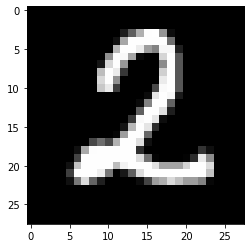

In [118]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [9]
Label:  9


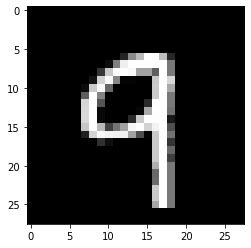

In [119]:
test_prediction(6, W1, b1, W2, b2)

Prediction:  [7]
Label:  7


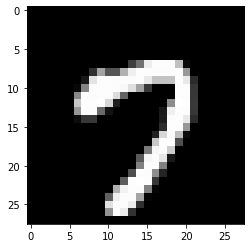

In [120]:
test_prediction(7, W1, b1, W2, b2)